### What are the specific challenges in using genetic algorithms for controlling a pendulum and achieving an upright position?
---

Using genetic algorithms (GAs) to control a pendulum and achieve an upright position introduces **complex solution spaces** where the vast and intricate possibilities make finding optimal solutions challenging.

The pendulum's dynamics are highly **sensitive to initial conditions and parameters**, such as length and gravitational force, where slight variations can lead to drastically different behaviors, complicating the GA's task.

Achieving a **balance between exploration and exploitation** is crucial, as GAs must navigate between trying new solutions and refining the best ones found, a challenging task in the pendulum's continuous state space.

The **evaluation complexity** of solutions, requiring simulation of the pendulum's physics, demands significant computational resources, especially as system complexity increases.

Deciding on an effective **encoding of solutions** presents another hurdle, as the representation must aptly capture the nuances of control actions for the GA to manipulate.

**Convergence speed** is also a concern, with GAs sometimes taking many generations to find optimal solutions, which may not be practical for real-time control.

Lastly, **translating simulated results to the real world** poses a challenge, as discrepancies between the digital twin and actual pendulum behavior can lead to ineffective real-world applications, necessitating adjustments for modeling inaccuracies.


This Python code is implementing a Genetic Algorithm (GA) to optimize the control of an inverted pendulum. Here's a line-by-line explanation:

1. `import numpy as np`: This line imports the numpy library, which provides support for large, multi-dimensional arrays and matrices, along with a large collection of mathematical functions to operate on these arrays.

2. `import random`: This line imports the random module, which contains functions for generating random numbers.

3. `import time`: This line imports the time module, which provides various time-related functions.

4. `from Digital_twin import DigitalTwin`: This line imports the `DigitalTwin` class from the `Digital_twin` module. A digital twin is a virtual representation of a physical object or system.

5. `class InvertedPendulumGA:`: This line defines a new class named `InvertedPendulumGA`. This class will implement a genetic algorithm for controlling an inverted pendulum.

6. `def __init__(self, population_size, num_actions, simulation_duration, action_resolution, simulation_delta_t):`: This line defines the constructor for the `InvertedPendulumGA` class. The constructor takes several parameters, including the size of the population, the number of actions, the duration of the simulation, the resolution of the actions, and the time step for the simulation.

7. `self.digital_twin = DigitalTwin()`: This line creates an instance of the `DigitalTwin` class, which will be used to simulate the behavior of the inverted pendulum.

8. `self.population_size = population_size`: This line sets the population size for the genetic algorithm.

9. `self.parent_pool_size = 4`: This line sets the size of the parent pool for the genetic algorithm.

10. `self.num_actions = num_actions`: This line sets the number of actions that can be taken in the simulation.

11. `self.simulation_duration = simulation_duration`: This line sets the duration of the simulation.

12. `self.action_resolution = action_resolution`: This line sets the resolution of the actions.

13. `self.simulation_delta_t = simulation_delta_t`: This line sets the time step for the simulation.

14. `self.simulation_steps = simulation_duration/simulation_delta_t`: This line calculates the number of steps in the simulation.

15. `self.num_steps = int(simulation_duration / action_resolution)`: This line calculates the number of steps in the action sequence.

16. `self.step_resolution = int(action_resolution / simulation_delta_t)`: This line calculates the number of simulation steps per action step.

17. `self.population = [self.create_individual() for _ in range(population_size)]`: This line creates the initial population of individuals.

18. `fitness_scores = self.evaluate_population()`: This line evaluates the fitness of the initial population.

19. `print(fitness_scores, "at start")`: This line prints the fitness scores of the initial population.



This is an example usage of the `InvertedPendulumGA` class, which uses a genetic algorithm to optimize the control of an inverted pendulum.

1. `ga = InvertedPendulumGA(population_size=100, num_actions=9, simulation_duration=4, action_resolution=0.2, simulation_delta_t=0.005)`: This line creates an instance of the `InvertedPendulumGA` class. The parameters are:
   - `population_size=100`: The population size for the genetic algorithm is set to 100.
   - `num_actions=9`: The number of possible actions that can be taken at each step is set to 9.
   - `simulation_duration=4`: The duration of the simulation for each individual in the population is set to 4 units of time.
   - `action_resolution=0.2`: The resolution of each action, or the amount of time that each action takes, is set to 0.2 units of time.
   - `simulation_delta_t=0.005`: The time step for the simulation is set to 0.005 units of time.

2. `best_solution = ga.optimize(num_generations=100, fitness_threshold=np.pi)`: This line runs the genetic algorithm optimization process. The parameters are:
   - `num_generations=100`: The number of generations to run the genetic algorithm for is set to 100.
   - `fitness_threshold=np.pi`: The fitness threshold for the genetic algorithm is set to π. If any individual achieves a fitness score of π or higher, the optimization process will stop early and return that individual.

3. `print("Best Solution:", best_solution)`: This line prints the best solution found by the genetic algorithm. The best solution is the individual with the highest fitness score after running the specified number of generations, or the first individual to meet or exceed the fitness threshold, if any.

This code is implementing a genetic algorithm to optimize the control of an inverted pendulum. Here's a line-by-line explanation:

1. `create_individual(self)`: This function creates an individual sequence of actions with balanced left and right actions and boundary constraints. It starts with neutral actions and then randomly chooses actions, while keeping track of the net movement. If the net movement is too far to the right or left, it chooses an action to balance it.

2. `simulate(self, actions)`: This function simulates the inverted pendulum with the given actions and returns a fitness score. It resets the pendulum's state, then performs each action in the list, updating the pendulum's state each time. The fitness score is the maximum absolute angle the pendulum reaches. If the pendulum moves too far horizontally, it returns a negative score.

3. `evaluate_population(self)`: This function evaluates the fitness of the entire population by simulating each individual and returning their fitness scores.

4. `select_parents(self, fitness_scores)`: This function selects a pool of parent individuals based on their fitness scores. It selects the top performers to form the pool.

5. `crossover(self, parent1, parent2)`: This function performs crossover between two parents to produce an offspring. It randomly chooses a crossover point and combines the actions from each parent at that point.

6. `mutate(self, individual, mutation_rate=0.2)`: This function mutates an individual's actions with a given mutation rate. It randomly changes some of the individual's actions based on the mutation rate.

7. `run_generation(self)`: This function runs a single generation of the genetic algorithm, using all parents in the pool to create offspring. It evaluates the population, selects parents, shuffles the parents, and creates a new population by performing crossover and mutation.

8. `optimize(self, num_generations, fitness_threshold)`: This function optimizes the inverted pendulum control over a number of generations or until an individual meets the fitness threshold. It runs a number of generations, evaluates the population after each generation, and checks if the best individual meets the fitness threshold. If no individual meets the threshold, it returns the best individual found.

9. The last part of the code is an example usage of the genetic algorithm. It creates an instance of the `InvertedPendulumGA` class, runs the optimization, and prints the best solution found.

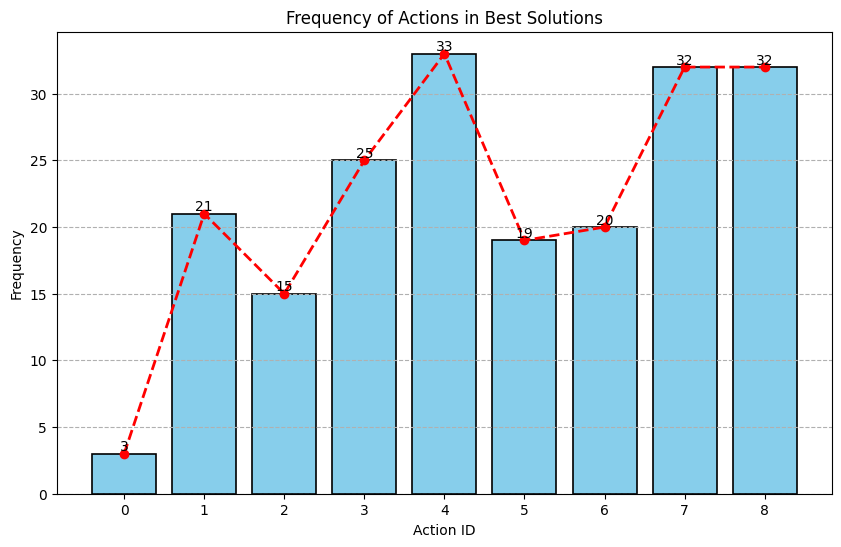

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

try:
    df = pd.read_csv('best_solution_sequence.csv')
    best_solutions = df.values.tolist()
except FileNotFoundError:
    print("File 'best_solution_sequence.csv' not found.")

flat_solutions = np.concatenate(best_solutions)
action_counts = np.bincount(flat_solutions)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(len(action_counts)), action_counts, color='skyblue', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Action ID')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Actions in Best Solutions')
ax.set_xticks(range(len(action_counts)))
ax.grid(axis='y', linestyle='--')
ax.plot(action_counts, color='red', marker='o', linestyle='--', linewidth=2)

for i, count in enumerate(action_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')


plt.show()


## Can you come-up with another method of evaluation that will improve the learning rate?
---

The integration of machine learning (ML) with genetic algorithms (GA) for managing pendulums provides a viable route to improve efficiency and efficacy. ML-assisted evaluation is at the vanguard of this integration, using a trained ML model to speed up the fitness evaluation process for GA persons. Such a model, which is capable of predicting the results of prospective solutions based on previous GA runs, can reduce the need for time-consuming simulations, providing a faster option for fitness assessment. The model, which is originally trained on a dataset of parameters, actions, and corresponding fitness scores, functions as a predictive tool for estimating the fitness of new GA individuals. This dynamic model learns through periodic retraining, which incorporates new data from current GA rounds to improve its predicted accuracy.



The combination of GA and reinforcement learning results in a hybrid technique for more efficiently navigating the search space. This method guides the GA by training an RL agent in a simulation environment to create a pendulum control policy. The insights gained from the RL policy are utilized to seed the GA population with individuals who already exhibit some form of optimal behavior, essentially offering a head start. The GA then refines these answers, iterating to produce superior individuals that the RL agent may have overlooked. This symbiotic link between RL and GA lays the way for a more robust search mechanism that is both informed by previous triumphs and adaptable to new problems.


## What is fundamentally the problem with the current crossover function in the GA? Can you come up with a better version? (Bonus question)
---

The current crossover function in the genetic algorithm (GA) selects a random point in the parent sequences and creates an offspring by combining the segments of the parents' sequences before and after this point. This approach, while commonly used, has some limitations:

Loss of Good Combinations: If both parents have good sequences that confer high fitness but in different parts of their sequence, the crossover might not capture both of these advantageous segments in the offspring.

Disruption of Action Sequences: Crossover might split a sequence of actions that, together, produce a good result, thereby disrupting potentially beneficial combinations of actions.

Lack of Diversity: With only one crossover point, the diversity of the offspring can be limited, especially if the crossover point tends to be in the same region across generations.


A better version of the crossover function could incorporate the following ideas:

Multi-point Crossover
--
Instead of one crossover point, use multiple points which could help in retaining good combinations from different parts of the parent sequences.

```
def multipoint_crossover(self, parent1, parent2, points):
    offspring = np.array(parent1)
    for i in range(1, len(points), 2):
        if i + 1 < len(points):
            offspring[points[i]:points[i + 1]] = parent2[points[i]:points[i + 1]]
    return offspring
```

or, Uniform Crossover
---
Each gene (action) in the offspring comes from either parent with equal probability, preserving good genes throughout the chromosome.


```
def uniform_crossover(self, parent1, parent2):
    offspring = np.array([np.random.choice([gene1, gene2]) for gene1, gene2 in zip(parent1, parent2)])
    return offspring

```

### Learning these controls can be computationally expensive. Discuss how you could further minimize the computation you would need for this optimization. Could you learn step by step (instead of x seconds at ones)? Could you find a better initialization of the population?
---


In my research to enhance the computational efficiency of genetic algorithms for pendulum control, I'm evaluating several strategies. Firstly, adopting a step-by-step learning approach allows me to scrutinize the pendulum's motion in shorter increments, quickly identifying beneficial patterns.

Selecting an initial population that incorporates known partial solutions can provide a jumpstart to the optimization process, possibly accelerating convergence. Additionally, leveraging parallel computing to conduct simultaneous simulations would be a significant timesaver, contingent on available computational resources.

I'm considering dynamically adjusting mutation and crossover rates throughout the genetic algorithm's run to balance between exploration and exploitation. An early stop mechanism is also prudent, ceasing runs that stagnate, thus saving computational effort.

Lastly, employing fitness approximation methods where simpler models predict solution quality could reduce the necessity for exhaustive simulations. These strategies are designed to make my algorithm not just effective but also resource-efficient.





